In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
file=pd.read_csv(r"D:\Edu File\Brillica Services project\python file\austo_automobile+(2)+(1).csv")

In [8]:
file

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [9]:
file.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [10]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [11]:
file.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [13]:
file.isnull().sum()  #check the null value in data



Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [14]:
file.groupby("Gender")["Gender"].count()   # check the number of males and females in the column

Gender
Femal        1
Female     327
Femle        1
Male      1199
Name: Gender, dtype: int64

In [15]:
file.Gender=file.Gender.replace(["Femal","Femle"],["Female","Female"])   # replace the incorrect values with correct values

In [16]:
# check descrpancies of all the columns one by one
file.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [17]:
file.Profession.unique()

array(['Business', 'Salaried'], dtype=object)

In [19]:
file.Make.unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [20]:
# to check link among salary, partner_salary,total_salary
# fetch the columns and create a new small dataset

sal=file[file.Partner_salary.notnull()][["Salary","Partner_salary","Total_salary"]]

In [21]:
sal

,Salary,Partner_salary,Total_salary
0,99300,70700.0,170000
1,95500,70300.0,165800
2,97300,60700.0,158000
3,72500,70300.0,142800
4,79700,60200.0,139900
...,...,...,...
1574,34700,0.0,34700
1575,34000,0.0,34000
1576,33300,0.0,33300
1578,32900,0.0,32900


In [22]:
(sal["Salary"]+sal["Partner_salary"]==sal["Total_salary"]).unique()

# to check total salary is equal to the saalry plus partener salary

array([ True])

# both columns are linked. we can use this link to fill the null values of partner salary

In [23]:
file.Partner_salary=file.apply(lambda row: row["Total_salary"]-row["Salary"] if np.isnan(row["Partner_salary"]) 
                                                                            else row["Partner_salary"],axis=1 )

In [24]:
file.Partner_salary=file.apply(lambda row: row["Total_salary"]-row["Salary"]if np.isnan(row["Partner_salary"]) 
                                                                            else row["Partner_salary"],axis=1 )

In [25]:
file.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

In [26]:
file.groupby("Make")["Make"].count()

Make
Hatchback    582
SUV          297
Sedan        702
Name: Make, dtype: int64

In [27]:
file.groupby(["Gender","Make"])["Make"].count()

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    565
        SUV          118
        Sedan        516
Name: Make, dtype: int64

In [28]:
file.groupby("Gender")["Gender"].count()

Gender
Female     329
Male      1199
Name: Gender, dtype: int64

In [29]:
MaleD=file[["Gender","Make"]].where(file.Gender=="Male").dropna()

In [30]:
FemaleD=file[["Gender","Make"]].where(file.Gender=="Female").dropna()

In [31]:
FemaleD

,Gender,Make
1,Female,SUV
2,Female,SUV
3,Female,SUV
5,Female,SUV
6,Female,SUV
...,...,...
1350,Female,Hatchback
1389,Female,Hatchback
1503,Female,Hatchback
1518,Female,Hatchback


In [32]:
fmd=FemaleD.groupby("Make").count().rename(columns={"Gender":"Female"})

In [33]:
fmd=FemaleD.groupby("Make").count().rename(columns={"Gender":"Female"})

In [42]:
sam1=MaleD.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [43]:
sam2=MaleD.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [44]:
sam3=MaleD.sample(329).groupby("Make").count().rename(columns={"Gender":"Male"})

In [45]:
sam1

,Male
Make,
Hatchback,157
SUV,33
Sedan,139


In [46]:
sam2

,Male
Make,
Hatchback,173
SUV,26
Sedan,130


In [47]:
sam3

,Male
Make,
Hatchback,148
SUV,31
Sedan,150


In [48]:
fmd

,Female
Make,
Hatchback,15
SUV,173
Sedan,141


In [49]:
SUVMale=[sam2.iloc[1][0],sam2.iloc[1][0],sam3.iloc[1][0]]

In [50]:
SUVFemale=[fmd.iloc[1][0],fmd.iloc[1][0],fmd.iloc[1][0]]

In [51]:
SUVDataSet=pd.DataFrame({"Male":SUVMale,"Female":SUVFemale},index=["SUV_Sample1","SUV_Sample2","SUV_Sample3"])

In [52]:
SUVDataSet

,Male,Female
SUV_Sample1,26,173
SUV_Sample2,26,173
SUV_Sample3,31,173


<Axes: >

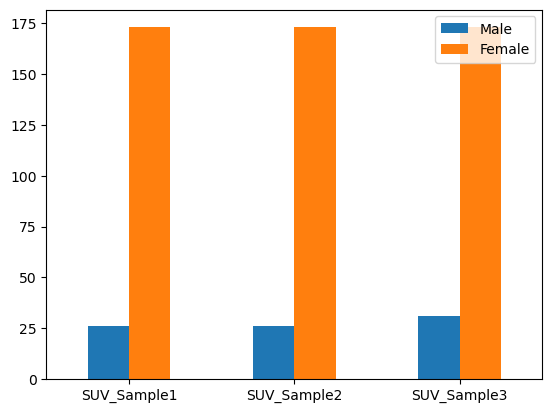

In [53]:
SUVDataSet.plot.bar(rot=0)

In [54]:
# tony stark believes that a salaried person is more likely to buy a sedan

file2=file.loc[:,["Profession","Make"]]



In [55]:
file2

,Profession,Make
0,Business,SUV
1,Salaried,SUV
2,Salaried,SUV
3,Salaried,SUV
4,Salaried,SUV
...,...,...
1576,Salaried,Hatchback
1577,Business,Hatchback
1578,Business,Hatchback
1579,Business,Hatchback


In [56]:
bs=file2.where(file2["Profession"]=="Business").dropna()
sl=file2.where(file2["Profession"]=="Salaried").dropna()

In [57]:
sl

,Profession,Make
1,Salaried,SUV
2,Salaried,SUV
3,Salaried,SUV
4,Salaried,SUV
5,Salaried,SUV
...,...,...
1569,Salaried,Hatchback
1574,Salaried,Sedan
1575,Salaried,Hatchback
1576,Salaried,Hatchback


In [58]:
bs

,Profession,Make
0,Business,SUV
14,Business,SUV
16,Business,SUV
18,Business,SUV
22,Business,SUV
...,...,...
1572,Business,Hatchback
1573,Business,Hatchback
1577,Business,Hatchback
1578,Business,Hatchback


In [59]:
bsData=bs.groupby("Make").count().rename(columns={"Profession":"Business"})

In [60]:
slData=sl.groupby("Make").count().rename(columns={"Profession":"Salaried"})

In [62]:
slData

,Salaried
Make,
Hatchback,292
SUV,208
Sedan,396


In [63]:
bsData

,Business
Make,
Hatchback,290
SUV,89
Sedan,306


In [64]:
bsList=[bsData.iloc[1][0],bsData.iloc[2][0]]

In [65]:
slList=[slData.iloc[1][0],slData.iloc[2][0]]

In [66]:
bsList

[89, 306]

In [67]:
slList

[208, 396]

In [68]:
df1=pd.DataFrame({"Salaried":slList,"Business":bsList},index=["SUV","Sedan"])

<Axes: >

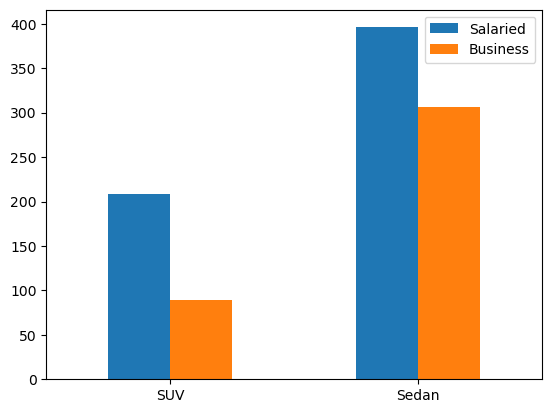

In [69]:
df1.plot.bar(rot=0)

In [70]:
# salaried male-

file3=file.loc[:,["Gender","Profession","Make"]]

In [71]:
file4=(file3.where((file3["Gender"]=="Male")&(file3.Profession=="Salaried")).dropna())[["Profession","Make"]]

In [72]:
file4

,Profession,Make
4,Salaried,SUV
7,Salaried,SUV
8,Salaried,SUV
9,Salaried,SUV
10,Salaried,SUV
...,...,...
1569,Salaried,Hatchback
1574,Salaried,Sedan
1575,Salaried,Hatchback
1576,Salaried,Hatchback


In [73]:
file3=file.loc[:,["Gender","Profession","Make"]]

In [76]:
file5=(file3.where((file3["Gender"]=="Male")&(file3.Profession=="Business")).dropna())[["Profession","Make"]]

In [77]:
salaried=file4.groupby("Make").count()

In [78]:
Business=file5.groupby("Make").count()

In [79]:
salaried

,Profession
Make,
Hatchback,276
SUV,85
Sedan,279


In [80]:
Business


,Profession
Make,
Hatchback,289
SUV,33
Sedan,237


In [81]:
salariedList=[salaried.iloc[0][0],salaried.iloc[1][0],salaried.iloc[2][0]]

In [82]:
BusinessList=[Business.iloc[0][0],Business.iloc[1][0],Business.iloc[2][0]]

In [83]:
df2=pd.DataFrame({"Salaried":salariedList,"Business":BusinessList},index=["Hatchback","SUV","Sedan"])

<Axes: >

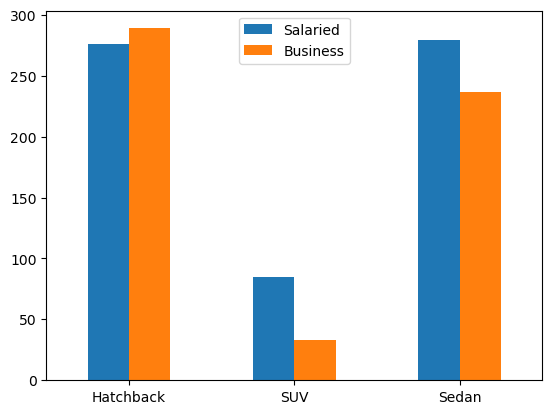

In [84]:
df2.plot.bar(rot=0)

In [85]:
file3.groupby(["Gender","Profession","Make"])["Make"].count()

Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
                    SUV          118
                    Sedan         91
Male    Business    Hatchback    289
                    SUV           33
                    Sedan        237
        Salaried    Hatchback    276
                    SUV           85
                    Sedan        279
Name: Make, dtype: int64

In [86]:
MaleD=file[["Gender","Make"]].where(file.Gender=="Male").dropna()

In [87]:
MaleD.groupby("Make").count().rename(columns={"Gender":"Male"})

,Male
Make,
Hatchback,565
SUV,118
Sedan,516


In [88]:
file6=file.where(file.Personal_loan=="Yes").dropna()[["Personal_loan","Make"]]

In [89]:
file6

,Personal_loan,Make
1,Yes,SUV
3,Yes,SUV
6,Yes,SUV
10,Yes,SUV
12,Yes,SUV
...,...,...
1572,Yes,Hatchback
1573,Yes,Hatchback
1574,Yes,Sedan
1575,Yes,Hatchback


In [90]:
yes=file6.groupby("Make").count()

In [91]:
file7=file.where(file.Personal_loan=="No").dropna()[["Personal_loan","Make"]]

In [92]:
no=file7.groupby("Make").count()

In [93]:
yes

,Personal_loan
Make,
Hatchback,291
SUV,111
Sedan,366


In [94]:
no

,Personal_loan
Make,
Hatchback,289
SUV,180
Sedan,291


In [95]:
yesList=[yes.iloc[0][0],yes.iloc[1][0],yes.iloc[2][0]]
noList=[no.iloc[0][0],no.iloc[1][0],no.iloc[2][0]]


In [96]:
yesList

[291, 111, 366]

In [97]:
noList


[289, 180, 291]

In [98]:
df3=pd.DataFrame({"Loan_Yes":yesList,"Loan_No":noList},index=["Hatchback","SUV","Sedan"])

<Axes: >

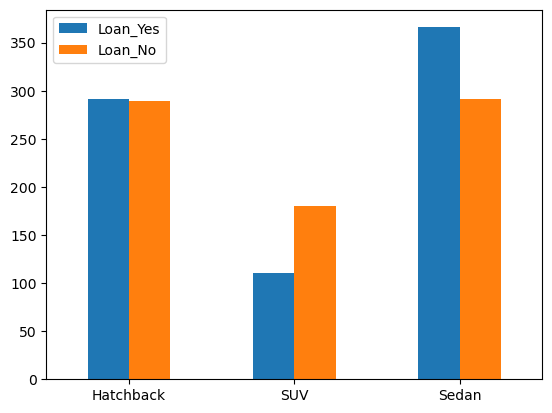

In [99]:
df3.plot.bar(rot=0)